## Import library 

In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
#關閉煩人的警告視窗!!!!!
import warnings
warnings.filterwarnings('ignore')

## Load Data

0: 存活 1:死亡

In [3]:
df = pd.read_csv('./archive/character-deaths.csv')

In [4]:
df.head(10)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,1,0,1
8,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,0,1,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,1,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


可以發現只有 Death Year, Book of Death, Death Chapter, Book Intro Chapter有缺失值

Death Year, Book of Death, Death Chapter對於最後的預測結果代表相同意思, 選擇其中一個欄位即可, 使資料集較為整潔 

## 選擇用 'Death Year'

In [6]:
df = df.rename(columns ={'Death Year': 'Death'}, inplace = False )

將Death中缺值以0代替, 有數值的轉成1 

In [7]:
df['Death'] = df.Death.fillna(0)
df.Death[df.Death>0] = 1
df.head()

,Name,Allegiances,Death,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0.0,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,1.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,1.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,NaN,NaN,NaN,1,1,0,0,1,0,0


## 將 'Allegiances' 轉成dummy特徵 

Allegiances 代表該角色效忠於哪一個家族
- 依據底下的值有幾種分類，會轉換成同樣數目的特徵欄位，每一欄位的值會再視其是否為該特徵，轉換成0或1

In [8]:
df1 = pd.get_dummies(df['Allegiances'])

In [9]:
df = pd.concat([df,df1], axis = 1)
df.head()

,Name,Allegiances,Death,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
0,Addam Marbrand,Lannister,0.0,NaN,NaN,56.0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,Aegon Frey (Jinglebell),None,1.0,3.0,51.0,49.0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Aegon Targaryen,House Targaryen,0.0,NaN,NaN,5.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adrack Humble,House Greyjoy,1.0,5.0,20.0,20.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aemon Costayne,Lannister,0.0,NaN,NaN,NaN,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death               917 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
 13  Arryn               917 non-null    uint8  
 14  Baratheon           917 non-null    uint8  
 15  Greyjoy             917 non-null    uint8  
 16  House Ar

In [11]:
#刪除不會再用到欄位
df = df.drop(['Book of Death', 'Death Chapter','Allegiances'], axis = 1)
df.head()

,Name,Death,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
0,Addam Marbrand,0.0,56.0,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,Aegon Frey (Jinglebell),1.0,49.0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Aegon Targaryen,0.0,5.0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Adrack Humble,1.0,20.0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Aemon Costayne,0.0,NaN,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Death               917 non-null    float64
 2   Book Intro Chapter  905 non-null    float64
 3   Gender              917 non-null    int64  
 4   Nobility            917 non-null    int64  
 5   GoT                 917 non-null    int64  
 6   CoK                 917 non-null    int64  
 7   SoS                 917 non-null    int64  
 8   FfC                 917 non-null    int64  
 9   DwD                 917 non-null    int64  
 10  Arryn               917 non-null    uint8  
 11  Baratheon           917 non-null    uint8  
 12  Greyjoy             917 non-null    uint8  
 13  House Arryn         917 non-null    uint8  
 14  House Baratheon     917 non-null    uint8  
 15  House Greyjoy       917 non-null    uint8  
 16  House La

發現 Book Intro Chapter還有缺值!!! 
- 登場章節介紹

> 如果這個角色沒有被慎重登場介紹的話, 可能可以預期他是個比較沒那麼重要的角色, 相對來說可能死亡機率會大一點

> 如果有被慎重介紹過的話, 可能這個角色就較為重要, 相對來說可能比較沒有那麼容易死亡

In [13]:
df = df.rename(columns = {'Book Intro Chapter':'Intro'})
df['Intro'] = df.Intro.fillna(0)
df.Intro[df.Intro>0] = 1

## Split training data and testing data 

In [69]:
X = df.iloc[:,2:] #因為 Death index是1 後面的為特徵值
y = df.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Create model 

In [70]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6).fit(X_train, y_train)
y_pred = clf.predict(X_test)

## 做出Confusion Matrix 並計算Precision, Recall, Accuracy

- Accuracy = (TP+TN)/Total
- Precision = TP/(TP+FP)
- Recall = TP/(TP+FN)
- F measure (F1 or F-score) = 2*precision*recall/(precision+recall)

In [71]:
#Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print('Confusion matrix: \n',matrix)

Confusion matrix: 
 [[137  31]
 [ 26  36]]


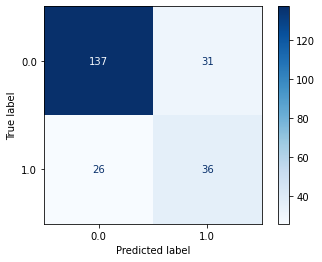

In [72]:
disp1 = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

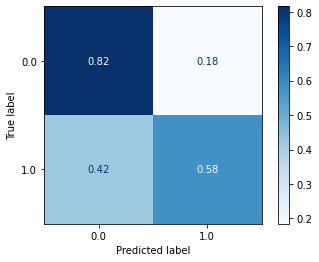

In [73]:
disp2 = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [74]:
#簡單評估一下模型好壞
#Accuracy = (TP+TN)/Total
accuracy = clf.score(X_test, y_test)
print('Accuracy = ', accuracy)

Accuracy =  0.7521739130434782


In [75]:
#Precision = TN/(TN+FN) 
precision = precision_score(y_test, y_pred)
#matrix[1,0] #test
#precision = matrix[0,0]/(matrix[0,0]+matrix[1,0])
print('Precision = ', precision)

Precision =  0.5373134328358209


In [43]:
#Recall = TN/(FP+TN)
recall = recall_score(y_test, y_pred)
#recall = matrix[0,0]/(matrix[0,0]+matrix[0,1])
print('Recall = ', recall)

Recall =  0.5806451612903226


In [44]:
#F measure (F1 or F-score) = 2*precision*recall/(precision+recall)
F_measure = 2*precision*recall/(precision+recall)
print('F measure = ', F_measure)

F measure =  0.5581395348837209


## Draw Tree

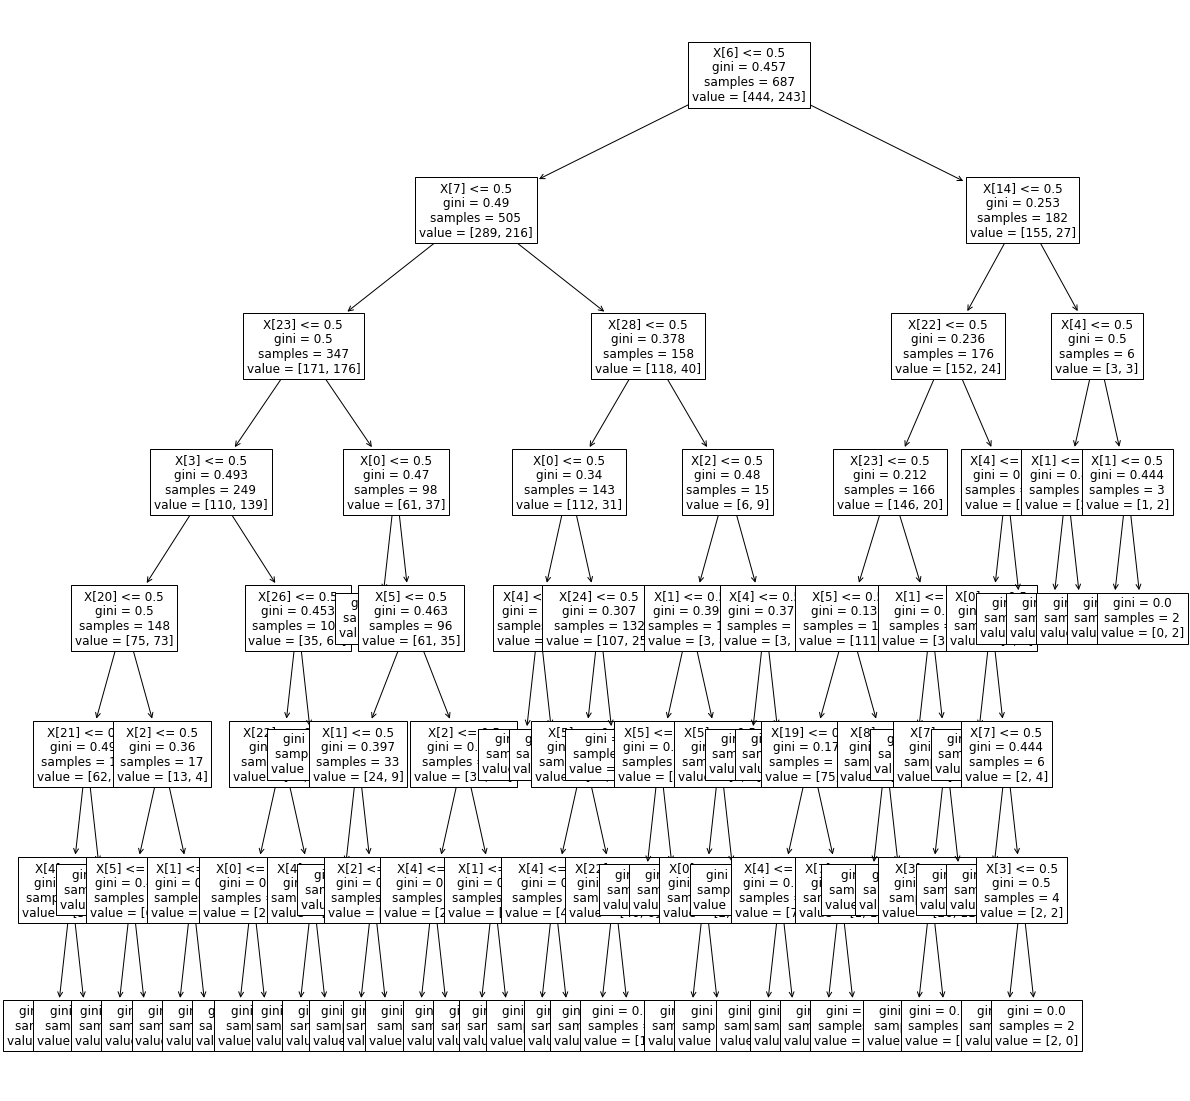

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, ax=ax, fontsize=12)
plt.show()